<a href="https://colab.research.google.com/github/maheshkumar30/Intellipaat-DataScience/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Linear Regression**
It is a model that finds the best straight line through a bunch of data points on a graph, so you can predict one value from another

Note:
It is a regression model under supervised learning -> We have `contiuous target value`

`y = mx + c + e`

* y -> Dependent variable
* x -> Independent variable (features)
* m -> Slope (we also denote it by `b1`)
* c -> Intercept (we denote it by `b0`)
* e -> some errors as data points will not directly fall on our straigt line

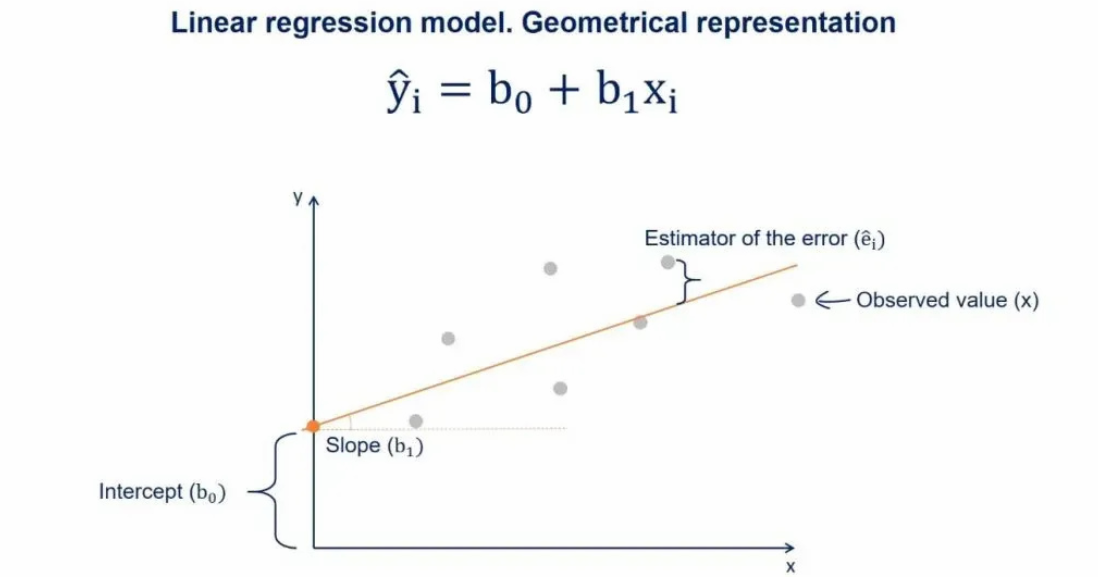

**Dataset link: https://drive.google.com/file/d/1kZ3BpQAdNtlEd-1dTpVyt_MgmXpNiyFe/view?usp=sharing**

##**Importing all Libraries**

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
insurance=pd.read_csv("new_insurance_data.csv")
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
insurance.shape

(1338, 13)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

###**Insight**
* There are some null value
* There are some object dtype(need to convert into numeric value)

In [6]:
insurance.isnull().sum().sum()

np.int64(52)

###**To drop the null value**
* df.dropna()

##**Data imputation**


In [7]:
col=list(insurance.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [10]:
insurance['children'].mode()

,children
0,0.0


In [11]:
insurance['Anual_Salary'].mean()

np.float64(369684859.7033724)

In [12]:
for cname in col:
    if cname=="children":
        insurance[cname]=insurance[cname].fillna(insurance[cname].mode()[0])
    elif insurance[cname].dtype == "object":
        insurance[cname]=insurance[cname].fillna(insurance[cname].mode()[0])
    else:
        insurance[cname]=insurance[cname].fillna(insurance[cname].mean())

In [13]:
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


###**Outlier Analysis**

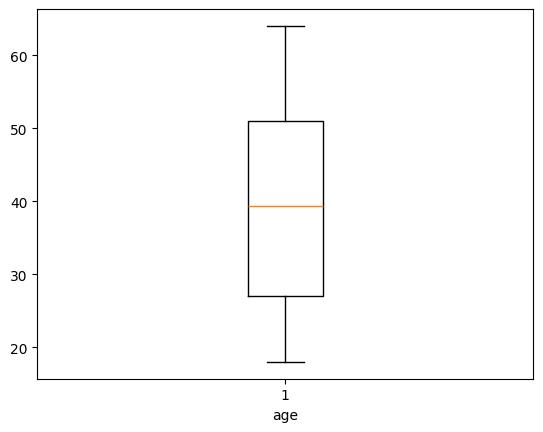

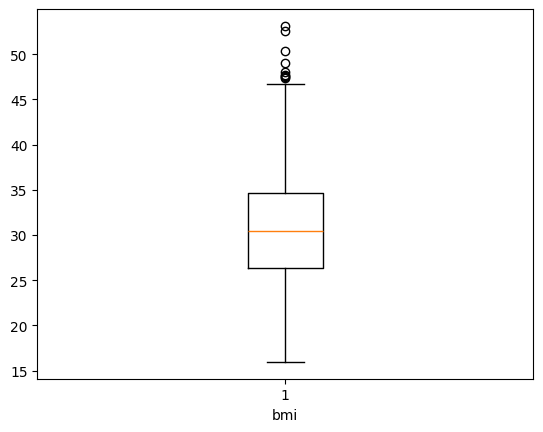

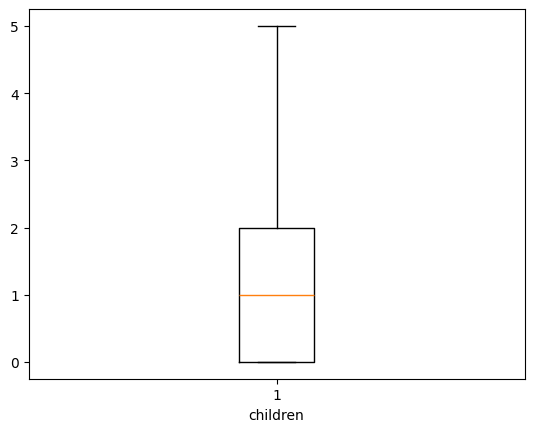

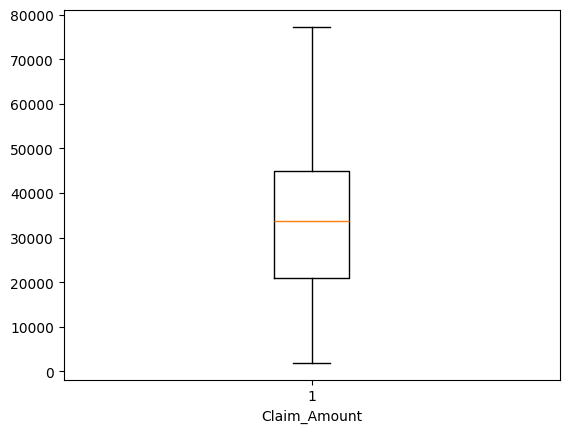

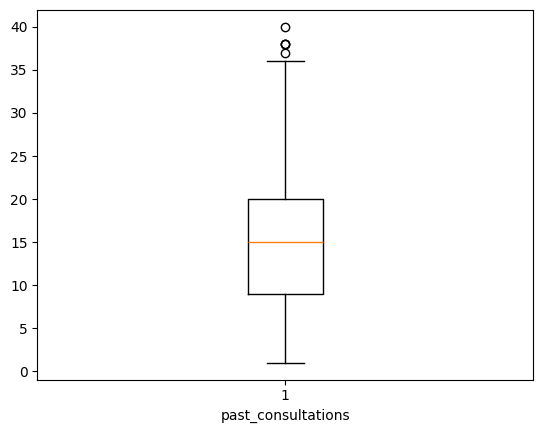

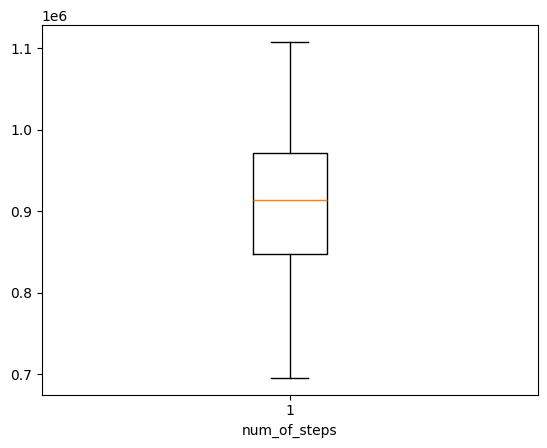

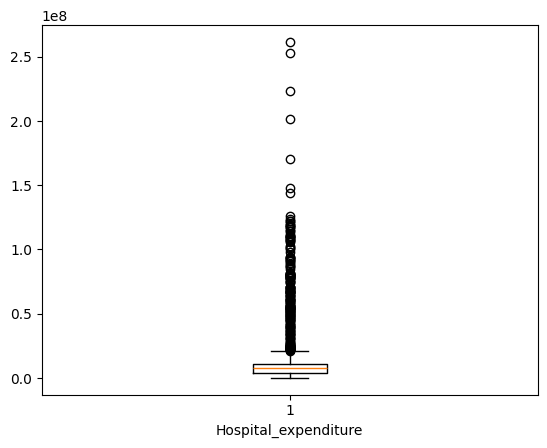

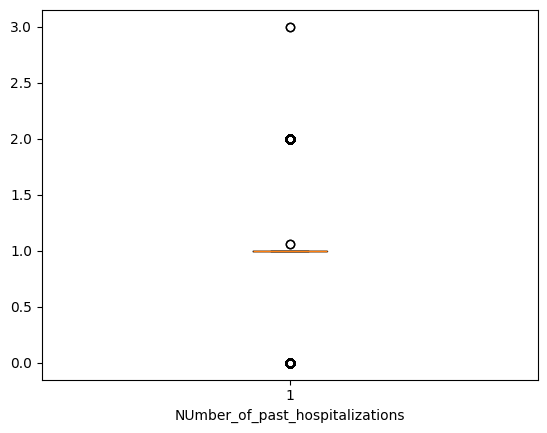

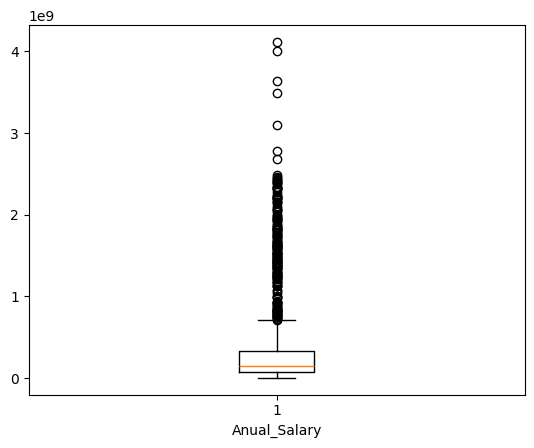

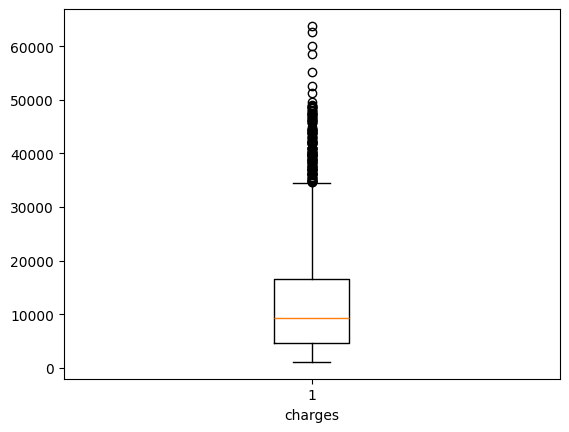

In [20]:
for cname in col:
    if insurance[cname].dtype == "float64":
        plt.boxplot(insurance[cname])
        plt.xlabel(cname)
        plt.show()

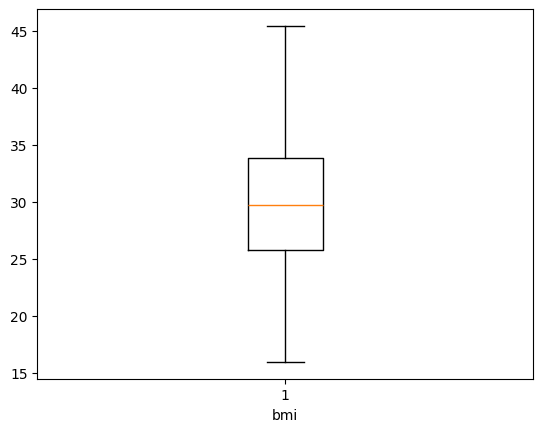

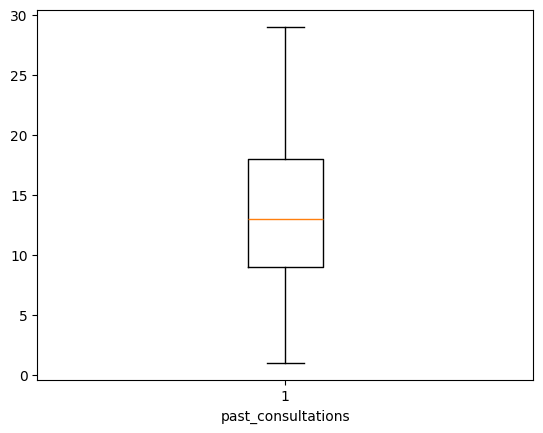

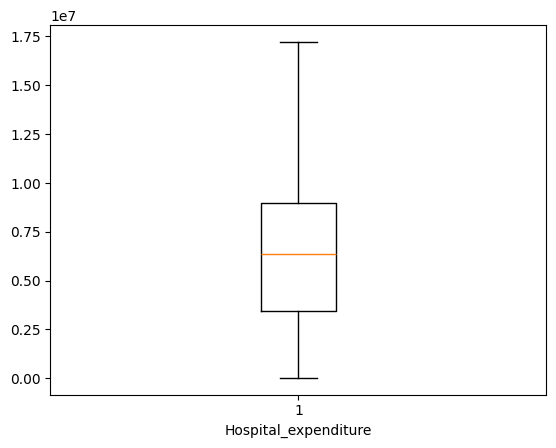

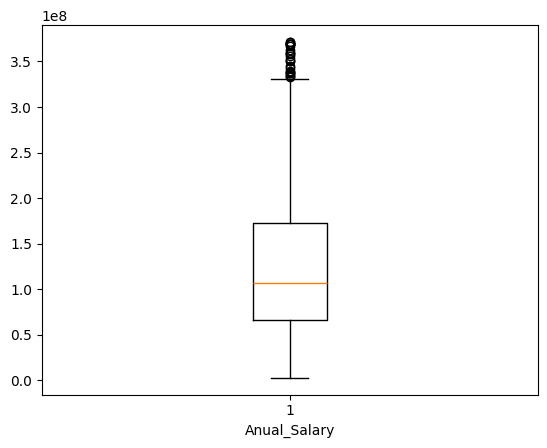

In [26]:
outCols=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for col in outCols:
    q1 = insurance[col].quantile(0.25)
    q3 = insurance[col].quantile(0.75)
    IQR = q3-q1
    lowerFence = q1 - (1.5*IQR)
    upperFence = q3 + (1.5*IQR)
    insurance = insurance[(insurance[col]>=lowerFence) & (insurance[col] <= upperFence)]
    plt.boxplot(insurance[col])
    plt.xlabel(col)
    plt.show()

###**Correlation Matrix**

In [27]:
corMat=insurance.corr(numeric_only = True)

In [ ]:
plt

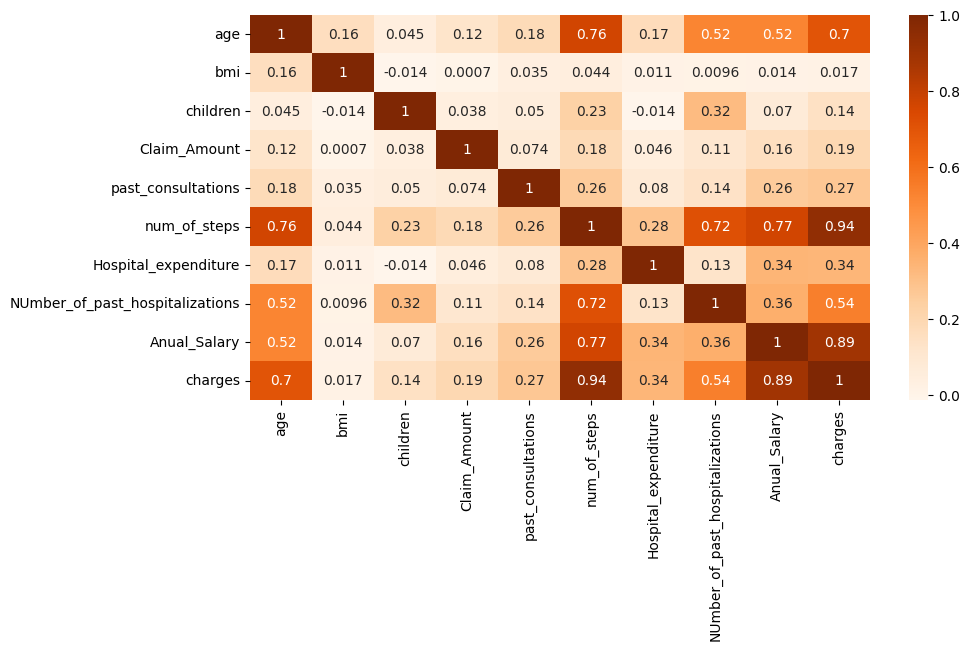

In [34]:
plt.figure(figsize=(10,5))
sb.heatmap(corMat,annot=True,cmap="Oranges")
plt.show()

###**Insights**
* Update it

##**Encoding**

It converts the data into numerical columns
* Label Encoder:Here,each object data is being given numerical values for ex(apple=0,banana=1,mango=2)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [46]:
cat_col=insurance.select_dtypes(include=['object']).columns
cat_col


Index(['sex', 'smoker', 'region'], dtype='object')

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
le=LabelEncoder()
for col in cat_col:
    insurance[col]=le.fit_transform(insurance[col])

In [51]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2,1137.0110


In [52]:
x=insurance.drop('charges',axis=1)
x.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2


In [54]:
st=StandardScaler()
x_scaled=st.fit_transform(x)
x = pd.DataFrame(x_scaled,columns = x.columns,index =x.index)

In [55]:
x.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,-1.474591,1.032008,-1.179570,-0.870487,-0.205064,-0.076629,0.677554,-2.296159,-0.382631,-2.421713,-0.871606,0.435265
1,-1.474591,1.032008,0.001663,-0.870487,-0.205064,0.619419,-1.004363,-2.532989,-0.505612,-2.421713,-1.400082,0.435265
2,-1.474591,1.032008,0.545404,-0.870487,-0.205064,0.617320,1.013937,-2.486645,0.297837,-2.421713,-0.648857,0.435265
3,-1.474591,1.032008,0.601654,-0.870487,-0.205064,-0.139636,-0.331596,-2.517080,-0.522926,-2.421713,-0.620018,0.435265
4,-1.474591,1.032008,0.676652,-0.870487,-0.205064,-1.081623,0.509362,-2.352110,-0.676218,-2.421713,-1.283153,0.435265


In [56]:
y=insurance['charges'] #Dependent Variable

##**Splitting the data**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [59]:
x_train.shape,x_test.shape

((812, 12), (204, 12))

##**Building Model**

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model=LinearRegression()

In [62]:
model.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred=model.predict(x_test)
y_pred

array([10818.92174652,  6989.92826392,  3446.00854763, 13139.86174306,
       12472.09419452,  7409.83103647, 11187.94318817,  2920.00809187,
        4494.43475882,  8142.08445721,  9378.39150239,  6090.71881832,
        9116.13718847,  9549.79105079, 10190.65863646,  6399.63202873,
       11955.9486496 ,  5350.56644491,  8040.01837077, 10943.00657728,
       10961.75746795,  3544.21319203,  4969.79577149, 19318.49123431,
       13424.53508512, 13961.98524273,  3863.26210839,  2857.80637255,
        4629.8788576 ,  8676.50203315, 10097.12206851,  2710.6000235 ,
         968.44242202,  4410.75011657,  6797.25734444, 14155.55420932,
       13658.22530606,  4166.66709658,  2235.20719632,  6736.87988038,
       10746.98242749, 13247.42272455,  6761.12760109,  8166.52208201,
        5658.52565859,   629.31564457, 10297.01853883,  2839.10294527,
       -1459.17173632,  5542.7558149 , 13437.15991791,  7489.70761888,
        5888.53550689,  2444.83099233,  8049.09761787, 12664.29135632,
      

In [66]:
from sklearn.metrics import r2_score,root_mean_squared_error

In [67]:
root_mean_squared_error(y_test,y_pred)

825.4104441649653

In [68]:
r2_score(y_test,y_pred)

0.9631741573615542

##**We are getting 96% model score for the data**

In [69]:
model.coef_  #  m -> slope

array([ 642.73794616,  -54.46908139,  -26.65731215,   31.86853276,
        578.52694074,   27.4476983 ,   26.38017381, 2710.32987983,
         63.23627111, -453.66994163, 1263.79386347,  -33.09663957])

In [70]:
model.intercept_

np.float64(7588.630750253387)

##**For Plotting Best Fit Line**

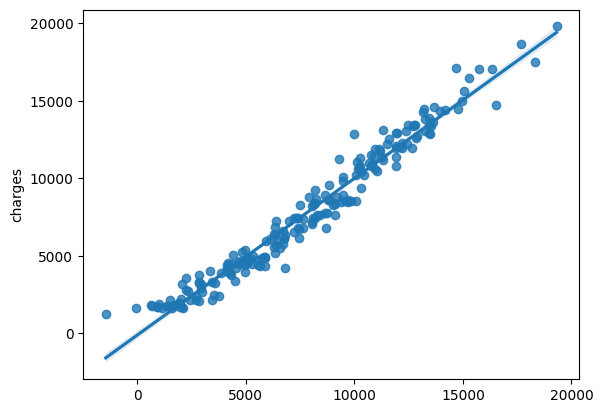

In [71]:
sb.regplot(x=y_pred,y=y_test)
plt.show()